In [22]:
#Import Libraly
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import asyncio



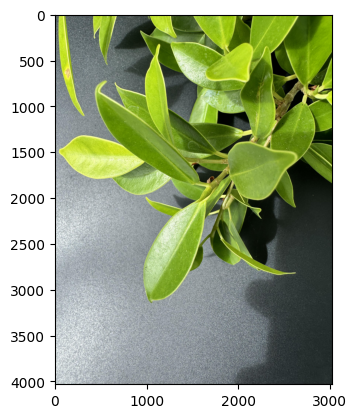

In [54]:
#Read input
input_directory = './TestData/1004.jpg'
image = cv2.imread(input_directory)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


In [55]:
#reshape + Apply K mean
pixels = image.reshape(-1, 3)


In [56]:
#Kmean Function
def K_Mean(K, image):
    #setup
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels.astype(np.float32), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    #Convert center to integers
    centers = np.uint8(centers)
    # Map each pixel to its corresponding cluster center
    segmented_image = centers[labels.flatten()].reshape(image.shape)
    return segmented_image


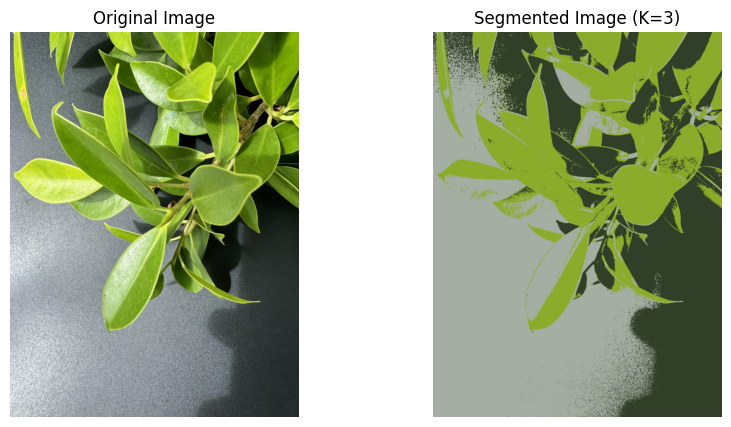

In [60]:
K = 3
output = K_Mean(K, image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (K={K})")
plt.imshow(output)
plt.axis('off')

plt.show()
